# PP4: supervised learning

<a href="https://colab.research.google.com/github/PauliusU/PP4-supervised-learning/blob/master/PP4_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Choosing dataset and supervised learning problem to solve

In [2]:
# Import Iris flower dataset and pprint for more readable output
from pprint import pprint
from sklearn.datasets import load_iris

# Initiate Iris flower dataset
iris_dataset = load_iris()

# Get to know data structure
print(f"type: {type(iris_dataset)}")
pprint(iris_dataset)

"""
Conclusion: dataset is saved in dictionary-like data structure <class 'sklearn.utils._bunch.Bunch'>.
The dataset contains a set of 5 attributes - 4 under "data" key, 1 under "target" key.
"feature_names" provides names for first 4 attributes.

Further goal is to solve classification problem by finding the best model for it.
"""


type: <class 'sklearn.utils._bunch.Bunch'>
{'DESCR': '.. _iris_dataset:\n'
          '\n'
          'Iris plants dataset\n'
          '--------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 150 (50 in each of three classes)\n'
          '    :Number of Attributes: 4 numeric, predictive attributes and the '
          'class\n'
          '    :Attribute Information:\n'
          '        - sepal length in cm\n'
          '        - sepal width in cm\n'
          '        - petal length in cm\n'
          '        - petal width in cm\n'
          '        - class:\n'
          '                - Iris-Setosa\n'
          '                - Iris-Versicolour\n'
          '                - Iris-Virginica\n'
          '                \n'
          '    :Summary Statistics:\n'
          '\n'
          '    ============== ==== ==== ======= ===== ====================\n'
          '                    Min  Max   Mean

'\nConclusion: dataset is saved in dictionary-like data structure <class \'sklearn.utils._bunch.Bunch\'>.\nThe dataset contains a set of 5 attributes - 4 under "data" key, 1 under "target" key.\n"feature_names" provides names for first 4 attributes.\n\nFurther goal is to solve classification problem by finding the best model for it.\n'

## Summarize the dataset

In [3]:
# Convert dataset to Pandas DataFrame for more detailed analysis

import pandas as pd

# Initiate pandas DataFrame with first 4 attributes
df = pd.DataFrame(iris_dataset["data"], columns=iris_dataset["feature_names"])
# Add last (5th) attribute
df["species"] = iris_dataset["target"]
df["species"] = df["species"].apply(lambda x: iris_dataset["target_names"][x])

# Get basic info about DataFrame
print(df.info)  # Concise summary of a DataFrame.
print(df.shape)  # (150, 5)
print(df.head())  # First 5 records
print(df.describe())  # Descriptive statistics
print(df.isnull().sum())
print(df.groupby("species").size())  # Group sizes for each species (class)

"""
Conclusions: 
1. Dataset contains 150 records - 50 in each of three Species (classes)
2. Column names are too long
"""

# Apply shorter column names
df = pd.DataFrame(iris_dataset["data"], columns=[
                  "setal length", "setal width", "petal length", "petal width"])
df["species"] = iris_dataset["target"]
df["species"] = df["species"].apply(lambda x: iris_dataset["target_names"][x])

# Verify shorter column names
print(df.head())


<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

## Plotting/visualizing

Goal: to understand the relation ship between the numerical features.

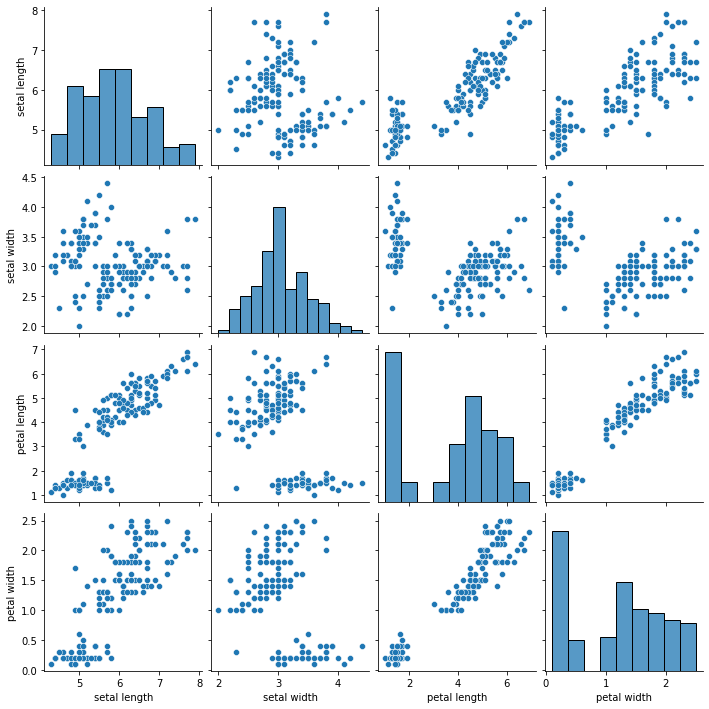

In [4]:
import seaborn as sns

# Use seaborn's pairplot() which is useful to scatter plot all the features at once instead of plotting them individually.
sns.pairplot(df)


'\nConclusion: pepal length and pepal width features are slightly correlated with each other (0.96)\n'

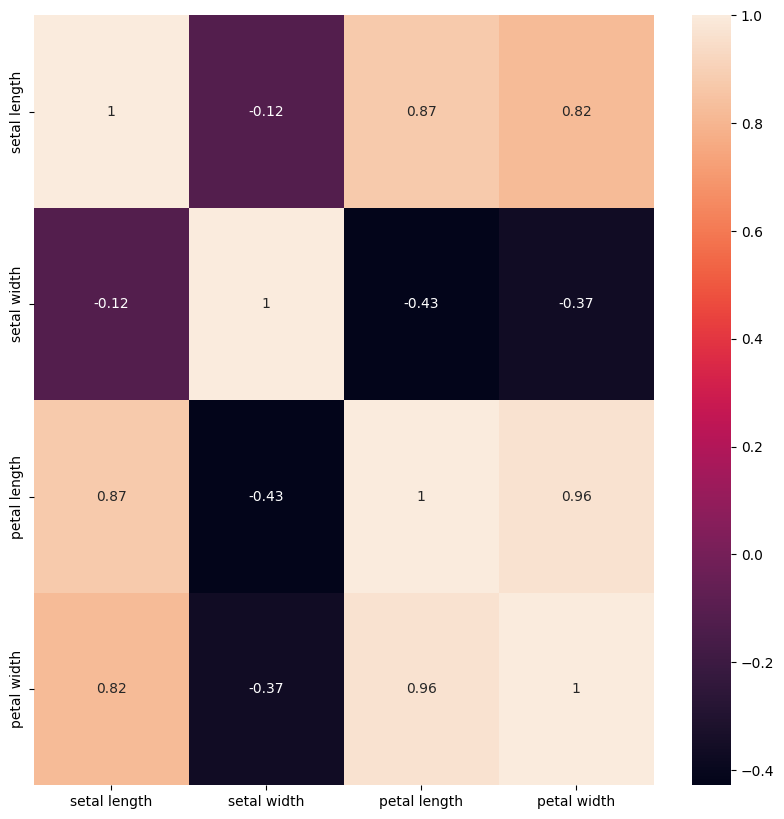

In [5]:
import matplotlib.pyplot as plt

# Check feature correlation to each other using heatmap
plt.figure(figsize=(10, 10))  # Set figure size
# Use df.corr() to compute pairwise correlation of columns, excluding NA/null values
sns.heatmap(df.corr(), annot=True)
plt.plot()

"""
Conclusion: petal length and petal width features are slightly correlated with each other (0.96)
"""


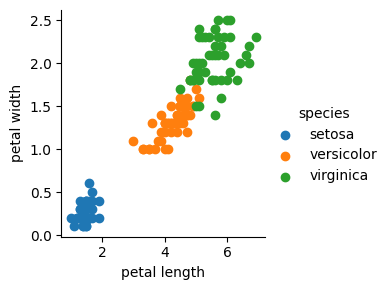

In [6]:
# Check data distribution based on petal length and width features with scatter plot

sns.FacetGrid(df, hue="species")\
    .map(plt.scatter, "petal length", "petal width")\
    .add_legend()
plt.show()


## Splitting dataset (preparation for training)

In [7]:
# Before implementing any model we need to split the dataset to train and test sets
from sklearn.model_selection import train_test_split

# Split the dataset to 70% as train and 30% as test datasets
train, test = train_test_split(df, test_size=0.3)

# X = iris_dataset.values[:, 0:4]
# Y = iris_dataset.values[:, 4]
# X_train, X_validation, Y_train, Y_validation = train_test_split(
#     X, Y, test_size=0.30,
#     # random_state=1
# )

# Verify splitting results
print(train.shape)  # (105, 5)
print(test.shape)  # (45, 5)

# Split the train and test sets further as input and output sets
train_X = train[["setal length", "setal width", "petal length", "petal width"]]
train_y = train.species
test_X = test[["setal length", "setal width", "petal length", "petal width"]]
test_y = test.species

# Verify splitting results again
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)


(105, 5)
(45, 5)
(105, 4)
(105,)
(45, 4)
(45,)


## Model training

In [20]:
# Import models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Import other helpers for accuracy score and cross validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

"""
Prepare for model training by selecting of 6 different algorithms:

	Simple linear algorithms:
1. Linear Discriminant Analysis (LDA)
2. Logistic Regression (LR)
	Nonlinear algorithms:
3. Classification and Regression Trees (CART)
4. Gaussian Naive Bayes (NB)
5. K-Nearest Neighbors (KNN)
6. Support Vector Machines (SVM)
"""
models = []
models.append(('CART', DecisionTreeClassifier()))
# Default n_neighbors is 5 (will be relevant later)
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression(
    solver='liblinear', multi_class='ovr')))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []  # Used in the final cell for plotting labels

"""
Use stratified 10-fold cross validation to estimate model accuracy.
Split dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.
"""
for name, model in models:
    k_fold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    # Evaluate a score by cross-validation
    cv_results = cross_val_score(
        model, train_X, train_y, cv=k_fold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)  # Used in the final cell for plotting labels
    print(f"{name}: {cv_results.mean() *100:.2f}% accuracy ({cv_results.std():.2f} standard deviation)")

"""
Conclusion: Accuracy scores slightly varies each time. However, LDA algorithm is constantly delivering the best results in my tests (>98%).
"""


CART: 91.18% accuracy (0.07 standard deviation)
KNN: 96.00% accuracy (0.05 standard deviation)
LDA: 98.09% accuracy (0.04 standard deviation)
LR: 95.18% accuracy (0.05 standard deviation)
NB: 94.18% accuracy (0.07 standard deviation)
SVM: 98.00% accuracy (0.04 standard deviation)


'\nConclusion: Accuracy scores slightly varies each time. However, LDA algorithm is constantly delivering the best results in my tests (>98%).\n'

## Tuning

Optimal K: 7


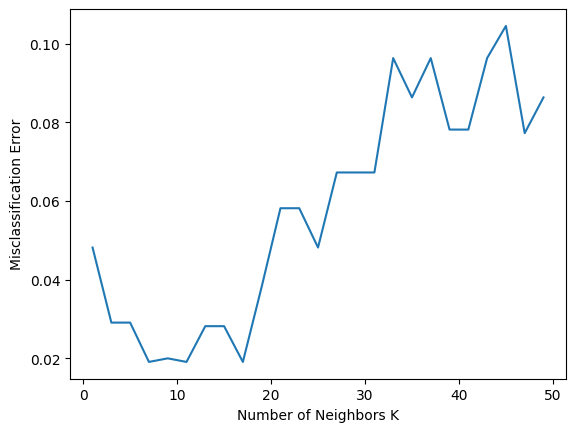

KNN accuracy (with optimal K of 7): 95.56%


'\nConclusion: hyperparameter tuning improved accuracy of KNN from ~96% to ~97%.\nHowever, improved KNN accuracy is still lower than the most accurate (LDA) algorithm.\n'

In [9]:
# Goal: tune second best algorithm in my tests (KNN) to see if it can exceed accuracy of the best (LDA) algorithm

# KNN hyper parameter tuning to select the best K. By default n_neighbors is 5.
neighbors = [x for x in range(1, 50) if x % 2 != 0]

# Empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_X, train_y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Misclassification error
MSE = [1-x for x in cv_scores]

# Find optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print(f"Optimal K: {optimal_k}")

# Plot misclassification error vs K
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Recalculate accuracy with optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(train_X, train_y)
knn_y_predict = knn.predict(test_X)
knn_accuracy = metrics.accuracy_score(test_y, knn_y_predict)
print(
    f"KNN accuracy (with optimal K of {optimal_k}): {knn_accuracy * 100:.2f}%")

"""
Conclusion: hyperparameter tuning improved accuracy of KNN from ~96% to ~97%.
However, improved KNN accuracy is still lower than the most accurate (LDA) algorithm.
"""


## Final evaluation and metrics

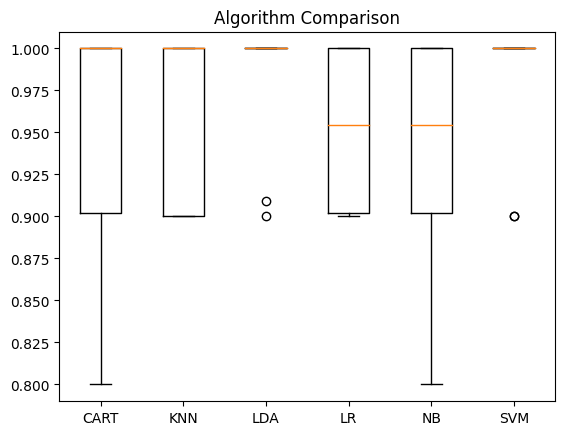

In [11]:
# Visually compare algorithms
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.show()


In [32]:
# LDA was the most accurate algorithm

model = LinearDiscriminantAnalysis()
model.fit(train_X, train_y)
predictions = model.predict(test_X)

# Evaluate the predictions
lda_accuracy = metrics.accuracy_score(test_y, predictions)
print(f"LDA accuracy score: {lda_accuracy * 100 :.2f}%")
print("Confusion matrix:")
print(metrics.confusion_matrix(test_y, predictions))
# Get the main classification metrics (precision, recall, f1-score, support)
print(metrics.classification_report(test_y, predictions))


LDA accuracy score: 97.78%
Confusion matrix:
[[12  0  0]
 [ 0 17  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.94      0.97        18
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



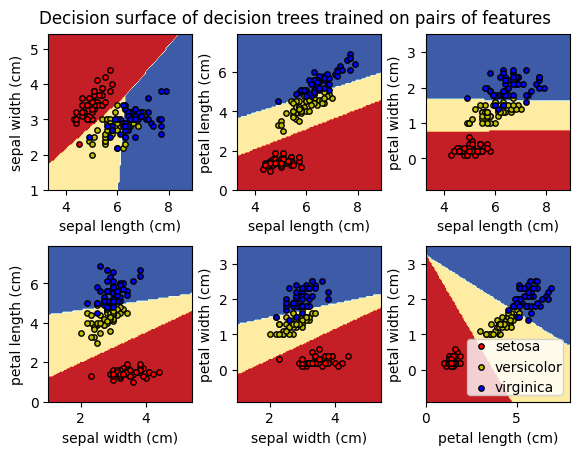

In [39]:
# Plot decision boundary (a.k.a. decision surface)
# Based on <https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html> but changed algorithm from CART to LDA

import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris_dataset.data[:, pair]
    y = iris_dataset.target

    # Train
    clf = LinearDiscriminantAnalysis().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris_dataset.feature_names[pair[0]],
        ylabel=iris_dataset.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris_dataset.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of LDA trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")